In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [429]:
# Directamente cargo los archivos para no tener que correr todo el código anterior.
data=pd.read_csv("csv/data.csv")
df_belongs_to_collection=pd.read_csv("csv/collection.csv")
df_production_countries=pd.read_csv("csv/countries.csv")
df_production_companies=pd.read_csv("csv/companies.csv")
df_crew=pd.read_csv("csv/director.csv")
df_genres=pd.read_csv("csv/genres.csv")
df_cast=pd.read_csv("csv/cast.csv")

In [430]:
data.shape

(45363, 15)

In [191]:
df_belongs_to_collection.shape

(4488, 5)

In [192]:
df_production_countries.shape

(49408, 3)

In [193]:
df_production_companies.shape

(70530, 4)

In [194]:
df_crew.shape

(49048, 6)

In [195]:
df_genres.shape

(91004, 3)

In [196]:
df_cast.shape

(562474, 7)

# Preparar los df
Hay que ponerlos de forma que se puedan juntar todos a uno (unirlos por id_pelicula, y que cada columna importante tenga su id -cambiar el nombre a aquellos que ya tengan id, para que no se repita el mismo nombre de -) y de ahi decidir las columnas que considero innecesarias para sacarlas.
Más adelante se va a usar los df sin unir para conseguir la información necesaria desde el df que junta 

### data

In [431]:
data.head(1)

,id_pelicula,title,overview,status,runtime,popularity,tagline,original_language,vote_average,vote_count,release_date,release_year,budget,revenue,return
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Released,81.0,21.946943,NaN,en,7.7,5415.0,1995-10-30,1995,30000000.0,373554033.0,12.451801


Considero innecesaria la fecha completa de estreno, voy a dejar solo el año.

In [198]:
type(data['release_year'][0])

numpy.int64

In [432]:
data.drop(columns='release_date',inplace=True)

Pasar "status" a numerico

In [200]:
a=pd.factorize(data['status'])[0]
data['status_num']=a

In [201]:
len(data['id_pelicula'].unique())

45346

In [202]:
data[data['status_num']!=0].shape

(439, 15)

In [203]:
data.head(3)

,id_pelicula,title,overview,status,runtime,popularity,tagline,original_language,vote_average,vote_count,release_year,budget,revenue,return,status_num
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Released,81.0,21.946943,NaN,en,7.7,5415.0,1995,30000000.0,373554033.0,12.451801,0
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,Released,104.0,17.015539,Roll the dice and unleash the excitement!,en,6.9,2413.0,1995,65000000.0,262797249.0,4.043035,0
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,Released,101.0,11.712900,Still Yelling. Still Fighting. Still Ready for...,en,6.5,92.0,1995,0.0,0.0,0.000000,0


Uno los dataframe a uno grande para realizar el analisis de relaciones entre las variables. Hay df que considere innecesarios de unir (el de paises, por ej)

Cambio los nombres de los id de cada df para diferenciarlos y que no se superpongan, al cambiarlos voy a poner "df_id" o una abreviación del nombre del df

### countries

Tiene problemas de memoria al ser tan grande, aún asi lo considero innecesario asi que no se va a mergear en el df de todo.<br>
Pero se analizó igual.

In [204]:
df_production_countries.head(1)

,iso_3166_1,name,id_pelicula
0,US,United States of America,862


Como los paises no tienen id les creo unos con el metodo 'factorize' de pandas

In [205]:
a=pd.factorize(df_production_countries['name'])[0]

In [206]:
df_production_countries['countrie_id']=a

In [207]:
df_production_countries

,iso_3166_1,name,id_pelicula,countrie_id
0,US,United States of America,862,0
1,US,United States of America,8844,0
2,US,United States of America,15602,0
3,US,United States of America,31357,0
4,US,United States of America,11862,0
...,...,...,...,...
49403,US,United States of America,30840,0
49404,PH,Philippines,111109,47
49405,US,United States of America,67758,0
49406,RU,Russia,227506,20


In [208]:
df_production_countries[df_production_countries['countrie_id']==100].head(3)

,iso_3166_1,name,id_pelicula,countrie_id
11481,MC,Monaco,28055,100
18296,MC,Monaco,36970,100
19469,MC,Monaco,41211,100


In [209]:
df_production_countries['name_countrie']=df_production_countries['name']
df_production_countries['short_name_countrie']=df_production_countries['iso_3166_1']

df_production_countries.drop(columns=['iso_3166_1','name'],inplace=True)

In [210]:
df_production_countries.shape

(49408, 4)

### companies

Es innecesario para nuestro EDA (en mi opinión) , asi que no lo voy a juntar, pero aún asi decidi analizarlo

In [211]:
df_production_companies.head(5)

,name,id,id_pelicula,revenue
0,Pixar Animation Studios,3.0,862,373554033.0
1,TriStar Pictures,559.0,8844,262797249.0
2,Teitler Film,2550.0,8844,262797249.0
3,Interscope Communications,10201.0,8844,262797249.0
4,Warner Bros.,6194.0,15602,0.0


In [212]:
df_production_companies[df_production_companies['id']==3.0]

,name,id,id_pelicula,revenue
0,Pixar Animation Studios,3.0,862,3.735540e+08
4334,Pixar Animation Studios,3.0,9487,3.632589e+08
5785,Pixar Animation Studios,3.0,863,4.973669e+08
9138,Pixar Animation Studios,3.0,585,5.628163e+08
11950,Pixar Animation Studios,3.0,12,9.403355e+08
15630,Pixar Animation Studios,3.0,9806,6.314421e+08
19881,Pixar Animation Studios,3.0,13925,0.000000e+00
20574,Pixar Animation Studios,3.0,920,4.619831e+08
21808,Pixar Animation Studios,3.0,2062,6.237228e+08
24309,Pixar Animation Studios,3.0,10681,5.213119e+08


In [213]:
df_production_companies['companie_id']=df_production_companies['id']
#df_production_companies['companie_name']=df_production_companies['name']
df_production_companies.drop(columns=['id','name','revenue'],inplace=True) #Innecesario tener revenue dos veces, esta columna era copia del df "data"

In [214]:
df_production_companies[df_production_companies['companie_id']==10201]

,id_pelicula,companie_id
3,8844,10201.0
159,2054,10201.0
451,79593,10201.0
671,161495,10201.0
884,46094,10201.0
1167,9057,10201.0
1288,46029,10201.0
1407,27281,10201.0
1434,43634,10201.0
1650,11511,10201.0


In [215]:
df_production_companies.drop_duplicates()

,id_pelicula,companie_id
0,862,3.0
1,8844,559.0
2,8844,2550.0
3,8844,10201.0
4,15602,6194.0
...,...,...
70525,30840,16323.0
70526,30840,38978.0
70527,111109,19653.0
70528,67758,6165.0


### genres

In [216]:
df_genres.head(5)

,id,name,id_pelicula
0,16.0,Animation,862
1,35.0,Comedy,862
2,10751.0,Family,862
3,12.0,Adventure,8844
4,14.0,Fantasy,8844


In [217]:
df_genres[df_genres['id'].isna()]

,id,name,id_pelicula


In [218]:
df_genres[df_genres['name'].isna()]

,id,name,id_pelicula


In [219]:
df_genres[df_genres['id_pelicula'].isna()]

,id,name,id_pelicula


In [220]:
len(df_genres['id_pelicula'].unique())

42962

In [221]:
df_genres['name'].unique()

array(['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance',
       'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History',
       'Science Fiction', 'Mystery', 'War', 'Foreign', 'Music',
       'Documentary', 'Western', 'TV Movie'], dtype=object)

In [222]:
df_genres['genre_id']=df_genres['id']
#df_genres['genre_name']=df_genres['name']
df_genres.drop(columns=['id','name'],inplace=True)

In [223]:
df_genres.head(1)

,id_pelicula,genre_id
0,862,16.0


In [224]:
df_genres[df_genres['genre_id']==16]

,id_pelicula,genre_id
0,862,16.0
34,21032,16.0
124,10530,16.0
557,15789,16.0
572,43475,16.0
...,...,...
90837,460135,16.0
90867,175457,16.0
90868,184402,16.0
90958,455661,16.0


### crew

In [225]:
df_crew.head(5)

,department,gender,id,job,name,id_pelicula
0,Directing,2.0,7879.0,Director,John Lasseter,862
1,Directing,2.0,4945.0,Director,Joe Johnston,8844
2,Directing,2.0,26502.0,Director,Howard Deutch,15602
3,Directing,2.0,2178.0,Director,Forest Whitaker,31357
4,Directing,2.0,56106.0,Director,Charles Shyer,11862


In [226]:
df_crew.shape

(49048, 6)

In [227]:
df_crew=df_crew[df_crew['department'].isin(['Directing'])].copy()

In [228]:
df_crew.head(5)

,department,gender,id,job,name,id_pelicula
0,Directing,2.0,7879.0,Director,John Lasseter,862
1,Directing,2.0,4945.0,Director,Joe Johnston,8844
2,Directing,2.0,26502.0,Director,Howard Deutch,15602
3,Directing,2.0,2178.0,Director,Forest Whitaker,31357
4,Directing,2.0,56106.0,Director,Charles Shyer,11862


In [229]:
df_crew.shape

(49048, 6)

In [230]:
df_crew['director_id']=df_crew['id']
df_crew.drop(columns='id',inplace=True)

In [231]:
df_crew.head(1)

,department,gender,job,name,id_pelicula,director_id
0,Directing,2.0,Director,John Lasseter,862,7879.0


In [232]:
#df_crew['crew_gender']=df_crew['gender']
#df_crew['crew_name']=df_crew['name']
#df_crew['crew_department']=df_crew['department']
#df_crew['crew_job']=df_crew['job']
df_crew.drop(columns=['gender','name','department','job'],inplace=True)

In [233]:
df_crew[df_crew['director_id']==12893]

,id_pelicula,director_id


### Cast

En el caso de cast ya contaba con cast_id pero se encontraban repetidos en gran proporción y no parecen dar información importante en el df_cast, parece más un id que diferencia el cast dentro de cada pelicula solamente, haciendo que los id se repitan ya que para cada pelicula este id se reinicia, por lo tanto no nos sirve.

En su lugar vamos a utilizar los valores de la columna id que se repiten solamente por la repetición de trabajos de una misma persona, es decir, este id pertenece a una persona en particular(es único).

In [234]:
df_cast.shape

(562474, 7)

In [235]:
df_cast.head(4)

,cast_id,character,gender,id,name,order,id_pelicula
0,14.0,Woody (voice),2.0,31.0,Tom Hanks,0.0,862
1,15.0,Buzz Lightyear (voice),2.0,12898.0,Tim Allen,1.0,862
2,16.0,Mr. Potato Head (voice),2.0,7167.0,Don Rickles,2.0,862
3,17.0,Slinky Dog (voice),2.0,12899.0,Jim Varney,3.0,862


Como se puede observar, los actores que menos se repiten suelen ser extras, los nombres de sus personajes comprueban que muchas veces ni hablas ni se mencionan sus nombres.<br>
más adelante voy a filtrar para que se guarde el id solamente de los actores que aparecen más de 4 veces.

Primero limpio con los nombres generales de los personajes que actúan.

In [236]:
df_cast.shape

(562474, 7)

In [237]:
df_cast=df_cast[df_cast['character']!='Extra']

In [238]:
df_cast=df_cast[df_cast['character']!='Fisherman']

In [239]:
df_cast=df_cast[df_cast['character']!='Epilogue Dancer']

In [240]:
df_cast=df_cast[df_cast['character']!='Tourist']

In [241]:
df_cast=df_cast[df_cast['character']!='Dancer']

In [242]:
df_cast=df_cast[df_cast['character']!='Classmate']

In [243]:
df_cast=df_cast[df_cast['character']!='Teacher']

In [244]:
df_cast=df_cast[df_cast['character']!='Friend']

In [245]:
df_cast=df_cast[df_cast['character']!='Policeman']

In [246]:
df_cast['character'] = df_cast['character'].fillna('')

In [247]:
filtro2 = ~df_cast['character'].str.contains("(uncredited)")
filtro3 = ~df_cast['character'].str.contains("Extra")

C:\Users\lasso\AppData\Local\Temp\ipykernel_14500\1525706705.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtro2 = ~df_cast['character'].str.contains("(uncredited)")


In [248]:
df_cast=df_cast[filtro2].copy()

In [249]:
df_cast=df_cast[filtro3].copy()

C:\Users\lasso\AppData\Local\Temp\ipykernel_14500\444997960.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cast=df_cast[filtro3].copy()


In [250]:
df_cast.shape

(541443, 7)

In [251]:
df_cast=df_cast[df_cast['character']!='']

In [252]:
df_cast.shape

(515660, 7)

In [253]:
filtro = df_cast.groupby('cast_id')['cast_id'].transform('count') == 4
df_repite1 = df_cast[filtro].copy()
df_repite1

,cast_id,character,gender,id,name,order,id_pelicula
16091,258.0,Narrator,0.0,1686569.0,Colin James Mackey,8.0,3083
90713,258.0,Studio 69 Girl,1.0,1775906.0,Marylee Picciano,99.0,818
90719,264.0,Japanese Business Man,2.0,179048.0,Michael Sun Lee,105.0,818
90720,265.0,Japanese Teen,0.0,1775910.0,Chris Sung,106.0,818
90722,267.0,Party Guest,0.0,1775913.0,Kevin Vila,108.0,818
...,...,...,...,...,...,...,...
546608,372.0,Young Mother,1.0,1050350.0,Brigitte Kali Canales,21.0,339403
553347,372.0,Mercury,0.0,1283308.0,Stéphane Mir,52.0,339964
553349,374.0,Palm Müret,0.0,1856297.0,Pier Ewudu,54.0,339964
556339,279.0,Collins,2.0,1334638.0,Jack Lowden,2.0,374720


In [254]:
df_cast['cast_id'].value_counts()

4.0       25467
3.0       24354
5.0       24350
6.0       22701
2.0       21771
          ...  
1111.0        1
1110.0        1
1109.0        1
329.0         1
438.0         1
Name: cast_id, Length: 567, dtype: int64

In [255]:
df_cast['id'].value_counts()

121323.0     165
113.0        146
2231.0       121
4165.0       114
16927.0      109
            ... 
110735.0       1
1283938.0      1
1218873.0      1
1739854.0      1
1686379.0      1
Name: id, Length: 189365, dtype: int64

In [256]:
df_cast[df_cast['cast_id']==4.0].head(3)

,cast_id,character,gender,id,name,order,id_pelicula
41,4.0,Ariel Gustafson,1.0,13567.0,Ann-Margret,2.0,15602
49,4.0,Robin Stokes,1.0,51359.0,Lela Rochon,3.0,31357
59,4.0,Annie Banks-MacKenzie,1.0,70696.0,Kimberly Williams-Paisley,3.0,11862


In [257]:
df_cast[df_cast['id']==121323.0].head(3)

,cast_id,character,gender,id,name,order,id_pelicula
13784,10.0,Fashion Show Spectator,1.0,121323.0,Bess Flowers,5.0,13320
13817,24.0,Diner at Ernie's,1.0,121323.0,Bess Flowers,9.0,426
13932,36.0,Plaza Hotel lounge patron,1.0,121323.0,Bess Flowers,20.0,213


In [258]:
# order es innecesario, es un valor dentro de cada pelicula
# por lo que fuera de cada una en un df que trata de gran variedad de peliculas
# no sirve, es una info personal de cada una.(para el director podría decirse)
df_cast['cast_id']=df_cast['id']
#df_cast['cast_character']=df_cast['character']
#df_cast['cast_name']=df_cast['name']
#df_cast['cast_gender']=df_cast['gender']
df_cast.drop(columns=['id','name','gender','order','character'],inplace=True)

In [259]:
df_cast.drop_duplicates(inplace=True)

In [260]:
df_cast.shape

(514334, 2)

Para limpiar más el dataset, voy a quitar los actores que actuaron menos de x cantidad de veces.

In [261]:
df_cast[df_cast['cast_id']==121323.0 ]    

,cast_id,id_pelicula
13784,121323.0,13320
13817,121323.0,426
13932,121323.0,213
14857,121323.0,705
15190,121323.0,381
...,...,...
524767,121323.0,148766
528785,121323.0,194310
533141,121323.0,242835
547616,121323.0,218213


In [262]:
df_cast['cast_id'].value_counts()

121323.0     164
113.0        146
2231.0       121
4165.0       114
16927.0      109
            ... 
75399.0        1
75400.0        1
75401.0        1
1454082.0      1
1686379.0      1
Name: cast_id, Length: 189365, dtype: int64

In [263]:
x = 4

# Obtener una Serie que indica si cada fila tiene un valor repetido más de x veces en la columna "cast_id"
filtro1 = df_cast.groupby('cast_id')['cast_id'].transform('count') > x

# Aplicar el filtro para obtener el DataFrame filtrado
df_cast = df_cast[filtro1].copy()

In [264]:
df_cast['cast_id'].value_counts()

121323.0     164
113.0        146
2231.0       121
4165.0       114
16927.0      109
            ... 
154649.0       5
111837.0       5
40887.0        5
86384.0        5
1198259.0      5
Name: cast_id, Length: 22929, dtype: int64

In [265]:
df_cast.head(5)

,cast_id,id_pelicula
0,31.0,862
1,12898.0,862
2,7167.0,862
3,12899.0,862
4,12900.0,862


In [266]:
df_cast.shape

(279786, 2)

### collection

In [267]:
df_belongs_to_collection.head(5)

,id,name,id_pelicula,revenue,budget
0,10194,Toy Story Collection,862,373554033.0,30000000.0
1,119050,Grumpy Old Men Collection,15602,0.0,0.0
2,96871,Father of the Bride Collection,11862,76578911.0,0.0
3,645,James Bond Collection,710,352194034.0,58000000.0
4,117693,Balto Collection,21032,11348324.0,0.0


In [268]:
df_belongs_to_collection[df_belongs_to_collection['id']==645].head(5)

,id,name,id_pelicula,revenue,budget
3,645,James Bond Collection,710,352194034.0,58000000.0
236,645,James Bond Collection,714,333011068.0,110000000.0
361,645,James Bond Collection,707,152427960.0,30000000.0
482,645,James Bond Collection,658,124881062.0,2500000.0
483,645,James Bond Collection,657,78898765.0,2000000.0


In [269]:
# Renombro la columna 'name' para distinguirla de otras
df_belongs_to_collection['collection_id']=df_belongs_to_collection['id']

# Elimino las columnas que duplique en su momento al crear este df, por si acaso.
df_belongs_to_collection.drop(columns=['name','id','revenue','budget'],inplace=True)

In [270]:
df_belongs_to_collection.shape

(4488, 2)

In [271]:
df_belongs_to_collection.head(5)

,id_pelicula,collection_id
0,862,10194
1,15602,119050
2,11862,96871
3,710,645
4,21032,117693


In [272]:
df_belongs_to_collection[df_belongs_to_collection['collection_id']==645].head(5)

,id_pelicula,collection_id
3,710,645
236,714,645
361,707,645
482,658,645
483,657,645


## Merge

Este merge es principalmente para ver la tabla de correlaciones de las variables.<br>
A la hora de utilizar parametros la idea es solamente usar los id para predecir (evita errores el usar numeros que identifiquen cada categoria, y también resultan ser dos columnas que dan la misma información la que tienen el nombre con las que tienen el id del nombre).<br>
Luego como mencioné más arriba voy a usar esos id una vez predichos para compararlos con el df que contiene todos sus datos y sacar el dato de nombre de ahi.

In [273]:
df_todo=pd.merge(data,df_genres,on='id_pelicula',how='left')
df_todo=pd.merge(df_todo,df_belongs_to_collection,on='id_pelicula',how='left')
df_todo=pd.merge(df_todo,df_crew,on='id_pelicula',how='left')


In [274]:
df_todo[df_todo['title']=='Toy Story'].shape

(3, 18)

In [275]:
df_todo.columns

Index(['id_pelicula', 'title', 'overview', 'status', 'runtime', 'popularity',
       'tagline', 'original_language', 'vote_average', 'vote_count',
       'release_year', 'budget', 'revenue', 'return', 'status_num', 'genre_id',
       'collection_id', 'director_id'],
      dtype='object')

Antes de continuar con el EDA, yo ya considero como columnas innecesarias:<br>

- title (se va a usar el "id_pelicula" para identificarlas.)
- overview
- runtime
- status
- tagline
- original_language
- genre_name (usamos el genre_id)
- crew_name (usamos el crew_id para identificar)
- crew_department
- crew_job
- cast_character
- cast_name (usamos cast_id)
- collection_name

Principalmente todo lo que sea texto, y fue introducido por id, se quita su nombre en texto y se deja solamente el id que lo representa.<br>
El resto que no esta representado por id, es innecesario.<br>
Antes de seguir el analisis, borro las columnas asi optimizamos la rápidez y el uso de recursos.

In [276]:
# No considero necesario status en ninguna forma, asi que también elimino la columna en números que le cree
#df_todo.drop(inplace=True,columns=['title' ,'overview','status','status_num','tagline','original_language','genre_name','crew_name','crew_department','crew_job','cast_character','cast_name' ,'collection_name'])

In [277]:
# Por ahora dejo "title" para el EDA de más adelante
df_todo.drop(inplace=True,columns=['overview', 'runtime','status','status_num','tagline','original_language'])

In [278]:
df_todo.columns

Index(['id_pelicula', 'title', 'popularity', 'vote_average', 'vote_count',
       'release_year', 'budget', 'revenue', 'return', 'genre_id',
       'collection_id', 'director_id'],
      dtype='object')

In [279]:
df_belongs_to_collection[df_belongs_to_collection['collection_id']==263]

,id_pelicula,collection_id
1431,272,263
1698,155,263
2228,49026,263


In [280]:
df_todo[df_todo['collection_id']==0]

,id_pelicula,title,popularity,vote_average,vote_count,release_year,budget,revenue,return,genre_id,collection_id,director_id


Para aquellos valores vacios de id de colecciones, voy a dejarles 0, entonces considero que cuando collection_id es igual a 0, no pertenecen a ningún conjunto de peliculas.

In [281]:
df_todo.loc[df_todo["collection_id"].isna(),"collection_id"]=0

In [282]:
# Me aseguro que la eliminación de columnas no haya dejado duplicados
df_todo.drop_duplicates(inplace=True)

In [283]:
df_todo.dtypes

id_pelicula        int64
title             object
popularity       float64
vote_average     float64
vote_count       float64
release_year       int64
budget           float64
revenue          float64
return           float64
genre_id         float64
collection_id    float64
director_id      float64
dtype: object

In [284]:
df_todo.describe(include='all')

,id_pelicula,title,popularity,vote_average,vote_count,release_year,budget,revenue,return,genre_id,collection_id,director_id
count,102281.000000,102281,102281.000000,102281.000000,102281.000000,102281.000000,1.022810e+05,1.022810e+05,1.022810e+05,99682.000000,102281.000000,1.010760e+05
unique,NaN,42196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Lumière and Company,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,97209.295969,NaN,3.566085,5.722319,149.567134,1992.121137,6.081766e+06,1.654793e+07,7.925294e+02,2052.363125,22203.390581,2.630817e+05
std,108945.891349,NaN,8.081809,1.735302,595.171190,23.546376,2.179526e+07,8.224499e+07,8.217717e+04,4113.869289,76761.453614,4.304915e+05
min,2.000000,NaN,0.000000,0.000000,0.000000,1874.000000,0.000000e+00,0.000000e+00,0.000000e+00,12.000000,0.000000,1.000000e+00
25%,21038.000000,NaN,0.523153,5.100000,4.000000,1979.000000,0.000000e+00,0.000000e+00,0.000000e+00,18.000000,0.000000,2.216400e+04
50%,49474.000000,NaN,1.474485,6.000000,13.000000,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00,35.000000,0.000000,7.409100e+04
75%,127380.000000,NaN,5.030112,6.800000,49.000000,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00,99.000000,0.000000,1.487720e+05


C:\Users\lasso\AppData\Local\Temp\ipykernel_14500\181340395.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr2 = df_todo.corr()


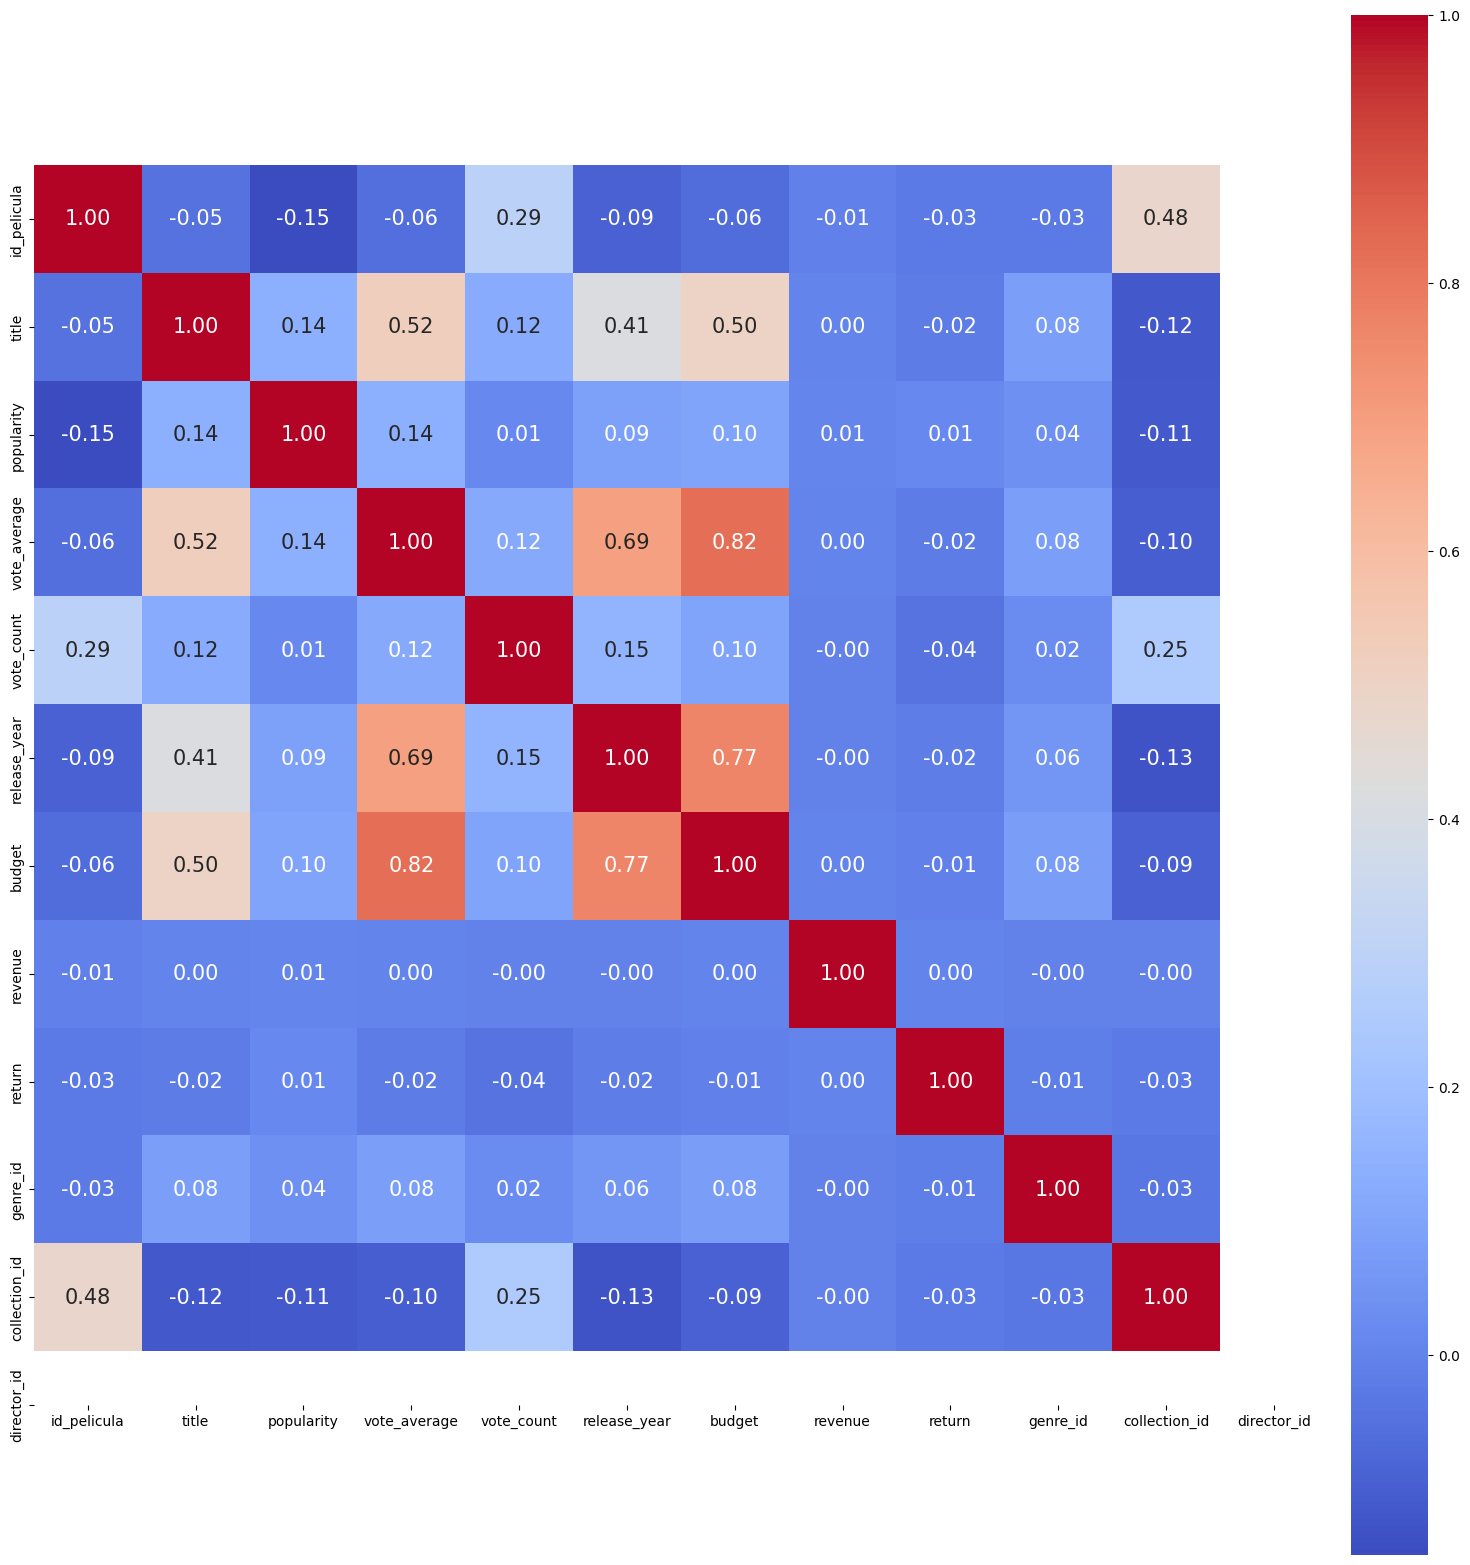

In [285]:
corr2 = df_todo.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr2, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df_todo.columns, 
           yticklabels= df_todo.columns,
           cmap= 'coolwarm')

plt.show()

El return como se ve no tiene ninguna relación, se quita (lo agregamos nosotros al df asi que sabemos lo que significa, pero es una relación entre budget y revenue, para predecir es innecesario.)<br>


In [286]:
df_todo.head(3)

,id_pelicula,title,popularity,vote_average,vote_count,release_year,budget,revenue,return,genre_id,collection_id,director_id
0,862,Toy Story,21.946943,7.7,5415.0,1995,30000000.0,373554033.0,12.451801,16.0,10194.0,7879.0
1,862,Toy Story,21.946943,7.7,5415.0,1995,30000000.0,373554033.0,12.451801,35.0,10194.0,7879.0
2,862,Toy Story,21.946943,7.7,5415.0,1995,30000000.0,373554033.0,12.451801,10751.0,10194.0,7879.0


In [287]:
# Directamente cargo los archivos para no tener que correr todo el código anterior.
print(data.shape)
print(df_belongs_to_collection.shape)
print(df_crew.shape)
print(df_genres.shape)
print(df_cast.shape)

(45363, 15)
(4488, 2)
(49048, 2)
(91004, 2)
(279786, 2)


Si considero genero,popularity, vote average y vote count las mejores variables para conseguir una mejor recomendación, viendo las relaciones de las variables creo que hay que quitar las columnas:<br>
- return
- cast_gender
- crew_gender

In [288]:
df_todo.drop(columns=['return'],inplace=True)

In [289]:
# Volvi a cuando edite cada df y deje solo las columnas a usar más adelante.
# df_todo.drop(columns=['return','cast_gender','crew_gender'],inplace=True)

In [290]:
df_todo.columns

Index(['id_pelicula', 'title', 'popularity', 'vote_average', 'vote_count',
       'release_year', 'budget', 'revenue', 'genre_id', 'collection_id',
       'director_id'],
      dtype='object')

In [291]:
df_todo.drop_duplicates(inplace=True) #Me aseguro de limpiar después de tirar tantas columnas
# Es probable que hayan filas repetidas

C:\Users\lasso\AppData\Local\Temp\ipykernel_14500\181340395.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr2 = df_todo.corr()


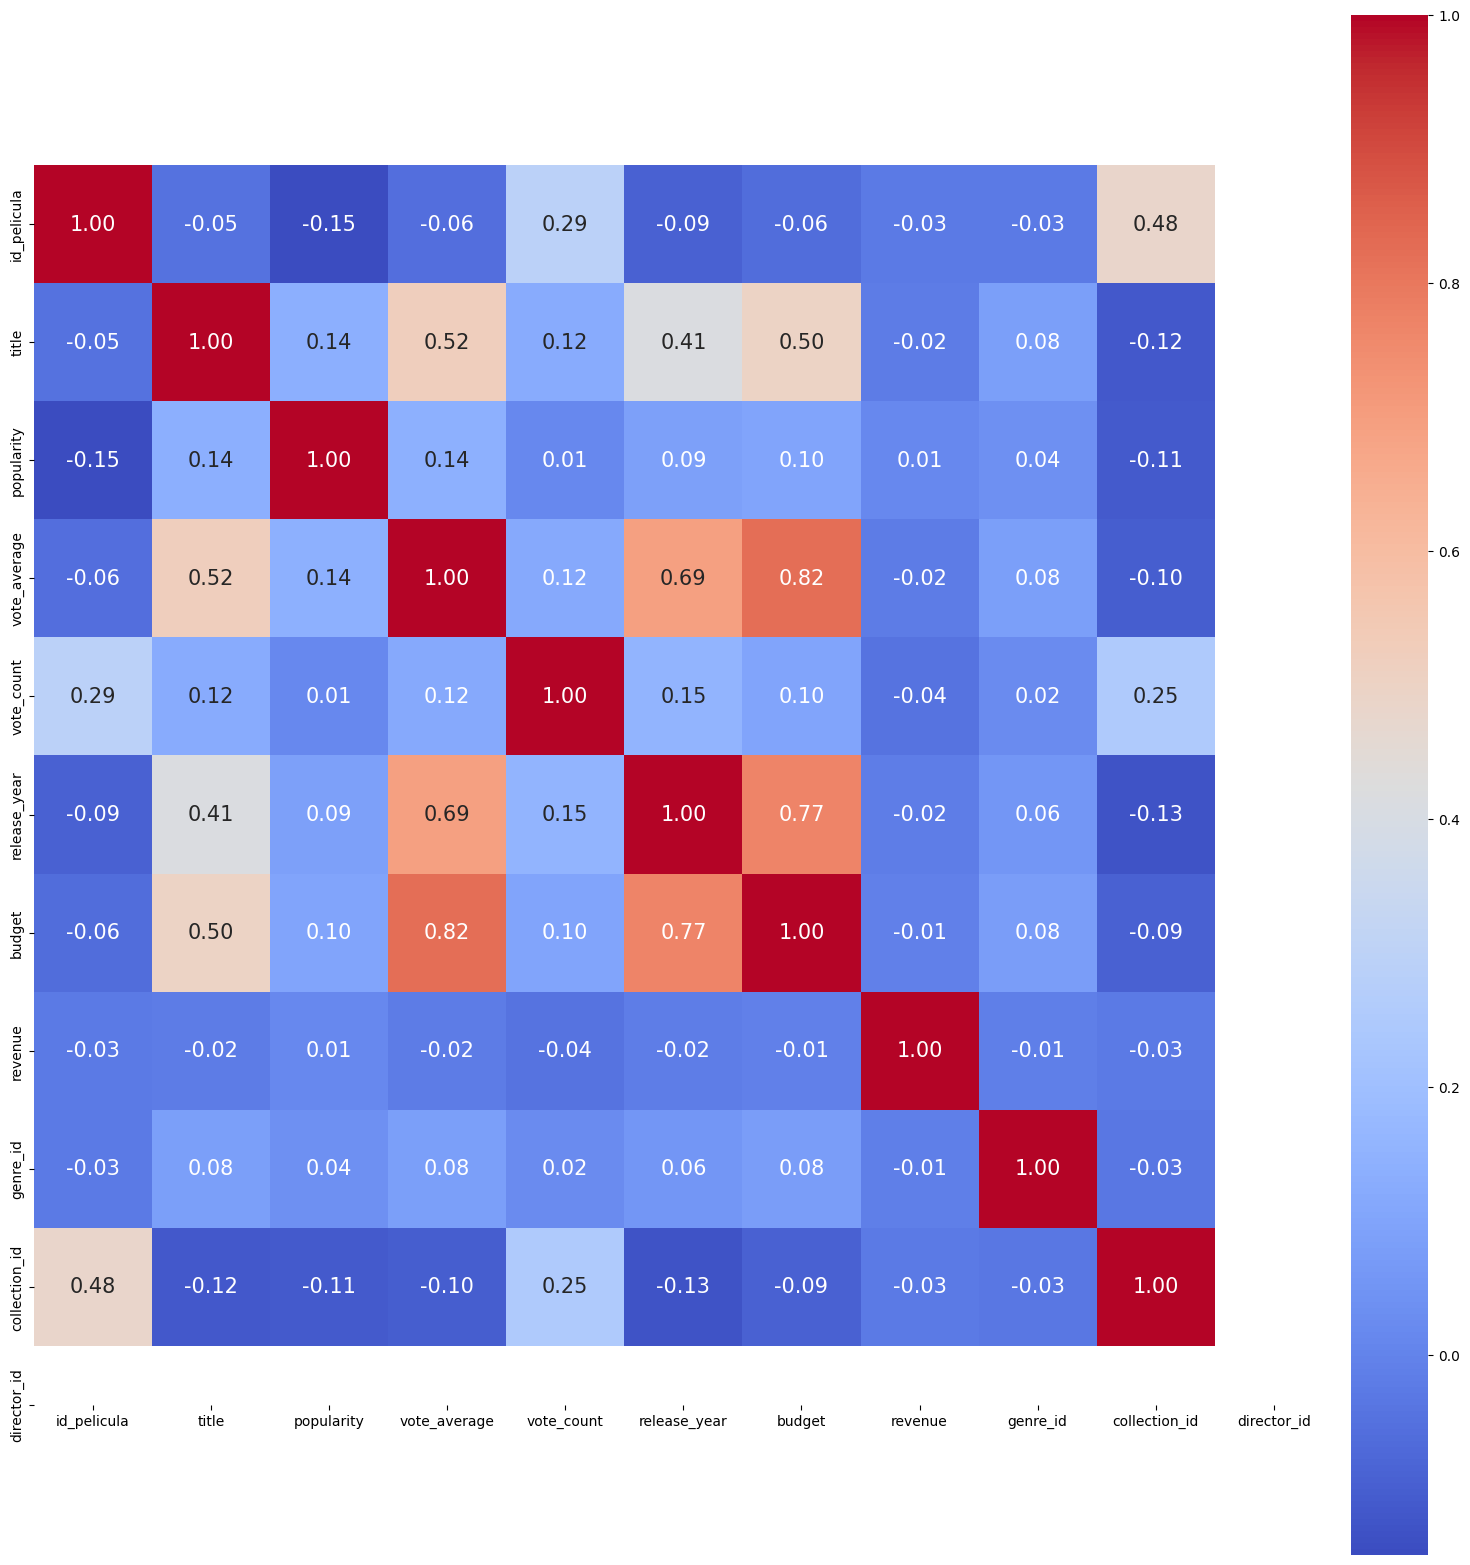

In [292]:
corr2 = df_todo.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr2, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df_todo.columns, 
           yticklabels= df_todo.columns,
           cmap= 'coolwarm')

plt.show()

Me deshago de la columna "runtime" que al tener nulos no voy a poder usar el modelo de K-NN, si fuera otra columna más importante buscaria otra manera, pero al ser solamente la de duración de las peliculas puedo quitarla sin sentir tanta lastima.

In [293]:
df_todo.isna().sum()

id_pelicula         0
title               0
popularity          0
vote_average        0
vote_count          0
release_year        0
budget              0
revenue             0
genre_id         2599
collection_id       0
director_id      1205
dtype: int64

Voy a deshacerme de filas para que no sea tan grande el df y los datos a considerar.

Voy a tomar como necesario algún valor en vote_count y vote_average.<br>
Ya que las peliculas van a setar devueltas por popularidad, esto también.<br>
Si dejo peliculas que tienen muy poca popularidad, ni siquiera van deberian ser recomendadas (ya que mi idea es que lo predicho se ordene por popularidad antes de devolver las peliculas recomendadas, estas nunca van a llegar al top 5), asi que también voy a filtrar por popularidad.

In [294]:
df_todo.sort_values(by='popularity',ascending=True).head()

,id_pelicula,title,popularity,vote_average,vote_count,release_year,budget,revenue,genre_id,collection_id,director_id
46654,288094,Casual Relations,0.0,0.0,0.0,1974,0.0,0.0,18.0,0.0,1077999.0
65887,89056,Double Game,0.0,0.0,0.0,1977,0.0,0.0,53.0,0.0,1075451.0
33516,225614,My Sons,0.0,0.0,0.0,1991,0.0,0.0,NaN,0.0,72496.0
50225,288109,Jean Renoir: Part One - From La Belle Époque t...,0.0,0.0,0.0,1993,0.0,0.0,99.0,0.0,1355664.0
65886,89056,Double Game,0.0,0.0,0.0,1977,0.0,0.0,28.0,0.0,1075451.0


In [295]:
df_todo.sort_values(by='popularity',ascending=False).head()

,id_pelicula,title,popularity,vote_average,vote_count,release_year,budget,revenue,genre_id,collection_id,director_id
72557,211672,Minions,547.488298,6.4,4729.0,2015,74000000.0,1.156731e+09,16.0,86066.0,124747.0
72561,211672,Minions,547.488298,6.4,4729.0,2015,74000000.0,1.156731e+09,35.0,86066.0,124747.0
72560,211672,Minions,547.488298,6.4,4729.0,2015,74000000.0,1.156731e+09,35.0,86066.0,8023.0
72559,211672,Minions,547.488298,6.4,4729.0,2015,74000000.0,1.156731e+09,12.0,86066.0,124747.0
72558,211672,Minions,547.488298,6.4,4729.0,2015,74000000.0,1.156731e+09,12.0,86066.0,8023.0


In [296]:
# Tengo 4365 peliculas
len(df_todo['id_pelicula'].unique())

45346

In [297]:
df_todo.shape

(102281, 11)

## Filtrar Por Vote_count

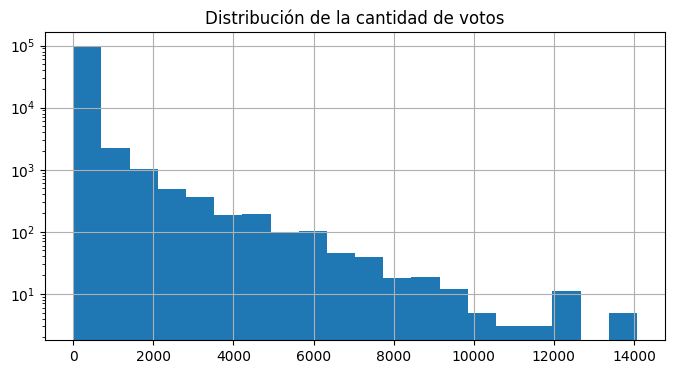

In [298]:
plt.figure(figsize = (8,4))

df_todo['vote_count'].hist(log = True, bins = 20)
plt.title('Distribución de la cantidad de votos')

plt.show()

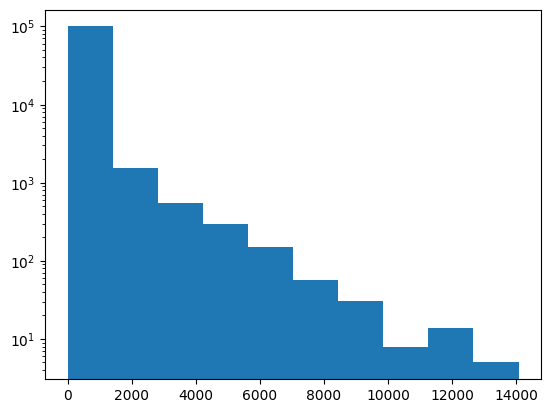

In [299]:
plt.hist(df_todo.vote_count, log= True)
plt.show()

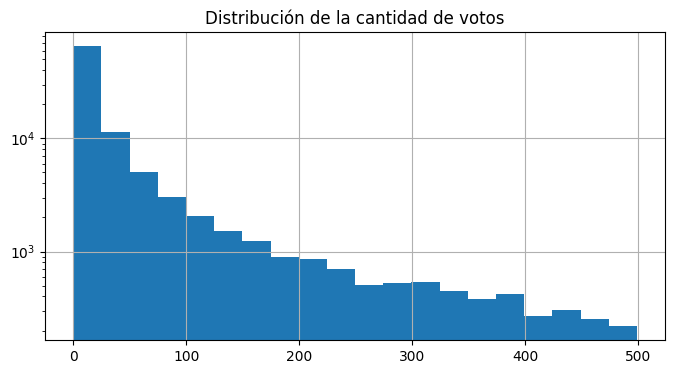

In [300]:
plt.figure(figsize = (8,4))

df_todo.vote_count[df_todo['vote_count']<500].hist(log = True, bins = 20)
plt.title('Distribución de la cantidad de votos')

plt.show()

In [301]:
# Viendo el grafico me doy cuenta que hay bastante peliculas 
# Con muy poca cantidad de vote_count, y estas no nos servirian para encontrar las mejores a recomendar.

df_poco_vote=df_todo[df_todo['vote_count']<=500]

In [302]:
# Me estaria deshaciendo de 2 millones de peliculas las cuales no cuentan
# Con el suficiente feedback para confiar en su vote_average.
print(df_poco_vote.shape)

(95984, 11)


In [303]:
len(df_poco_vote['id_pelicula'].unique())

43297

Por prueba, termino perdiendo DEMASIADAS peliculas aun poniendo como minimo 100 votos, asi que me quedo con que tiene que ser mayor a 20 votos, que ya me quita 30 mil peliculas del df

In [304]:
len(df_poco_vote['id_pelicula'][df_poco_vote['vote_count']<=100].unique())

39331

In [305]:
len(df_poco_vote['id_pelicula'][df_poco_vote['vote_count']<=50].unique())

36307

In [306]:
len(df_poco_vote['id_pelicula'][df_poco_vote['vote_count']<=0].unique())

2846

In [307]:
len(df_poco_vote['id_pelicula'][df_poco_vote['vote_count']<=30].unique())

33176

In [308]:
len(df_poco_vote['id_pelicula'][df_poco_vote['vote_count']<=20].unique())

30065

In [309]:
len(df_poco_vote['id_pelicula'][df_poco_vote['vote_count']<20].unique())

29603

In [310]:
df_todo=df_todo[df_todo['vote_count']>30].copy()

In [311]:
print(df_todo.shape)
df_todo['vote_count']

(32932, 11)


0         5415.0
1         5415.0
2         5415.0
3         2413.0
4         2413.0
           ...  
102851     146.0
102852     146.0
102853     146.0
102854     146.0
102862     145.0
Name: vote_count, Length: 32932, dtype: float64

In [312]:
len(df_todo['id_pelicula'].unique())

12170

In [313]:
df_todo['vote_count'].max()

14075.0

## Filtrar por popularidad

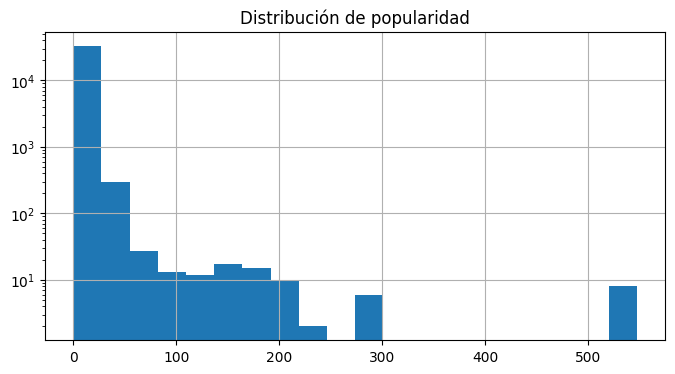

In [314]:
plt.figure(figsize = (8,4))

df_todo['popularity'].hist(log = True, bins = 20)
plt.title('Distribución de popularidad')

plt.show()

In [315]:
df_poca_popularidad=df_todo[df_todo['popularity']<=100].copy()

In [316]:
print(df_poca_popularidad.shape)
len(df_poca_popularidad['id_pelicula'].unique())

(32862, 11)


12154

In [317]:
len(df_todo['id_pelicula'].unique())

12170

Veo que valor me quitaria algunas peliculas sin que sea una exageración.

In [318]:
len(df_poca_popularidad['id_pelicula'][df_poca_popularidad['popularity']<=100].unique())

12154

In [319]:
len(df_poca_popularidad['id_pelicula'][df_poca_popularidad['popularity']<=50].unique())

12134

In [320]:
len(df_poca_popularidad['id_pelicula'][df_poca_popularidad['popularity']<=25].unique())

12017

In [321]:
len(df_poca_popularidad['id_pelicula'][df_poca_popularidad['popularity']<=10].unique())

9283

In [322]:
len(df_poca_popularidad['id_pelicula'][df_poca_popularidad['popularity']<=5].unique())

4141

In [323]:
len(df_poca_popularidad['id_pelicula'][df_poca_popularidad['popularity']<5].unique())

4141

In [324]:
len(df_poca_popularidad['id_pelicula'][df_poca_popularidad['popularity']<4].unique())

2917

In [325]:
len(df_poca_popularidad['id_pelicula'][df_poca_popularidad['popularity']<3].unique())

1626

In [326]:
len(df_poca_popularidad['id_pelicula'][df_poca_popularidad['popularity']<2].unique())

376

In [327]:
len(df_poca_popularidad['id_pelicula'][df_poca_popularidad['popularity']<1].unique())

46

In [328]:
Pel=list(df_poca_popularidad['id_pelicula'][df_poca_popularidad['popularity']<1].unique())

Si quito las peliculas con una popularidad menor a 3, no estoy quitando tantas peliculas.<br>
Pero con el siguiente analisis  se puede ver cómo popularity no habla bien de la pelicula, ya que hay varias dentro de esta baja popularidad que tienen muy buen valor de vote_average y cantidad de votos.<br>
No es buena decisión filtrar por popularidad, pero para asegurar al menos quitar aquellas que su popularidad es menor a 1. Ya que aun si vote_average es muy alto, que su popularidad sea baja significa que no llego a mucha gente, de cierta forma traducible a que no es una pelicula irrelevante, y que a aquellas que llego podemos deducir o que encontraron una joya, o que tienen gustos especificos, por lo tanto para el analisis general no sirven.

In [329]:
df_poca_popularidad['vote_average'][df_poca_popularidad['popularity']<3]

18        5.4
19        5.4
20        5.4
21        5.4
73        7.0
         ... 
102330    7.3
102640    6.5
102641    6.5
102688    5.9
102689    5.9
Name: vote_average, Length: 3791, dtype: float64

In [330]:
df_poca_popularidad[['id_pelicula','vote_count','vote_average']][df_poca_popularidad['popularity']<3].max()

id_pelicula     461955.0
vote_count        5282.0
vote_average         8.8
dtype: float64

In [331]:
df_poca_popularidad[['id_pelicula','vote_count','vote_average']][df_poca_popularidad['id_pelicula']==430128.0]

,id_pelicula,vote_count,vote_average
97383,430128,52.0,4.2


In [332]:
df_poca_popularidad[['id_pelicula','vote_count','vote_average']][df_poca_popularidad['popularity']<3].max()

id_pelicula     461955.0
vote_count        5282.0
vote_average         8.8
dtype: float64

In [333]:
df_poca_popularidad['vote_average'][df_poca_popularidad['popularity']<3].max()

8.8

In [334]:
df_poca_popularidad=df_poca_popularidad[df_poca_popularidad['vote_average']<5]

In [335]:
df_poca_popularidad['vote_average'].unique().min()

0.0

In [336]:
df_todo=df_todo[df_todo['popularity']>1]

## Filtrar por vote_average

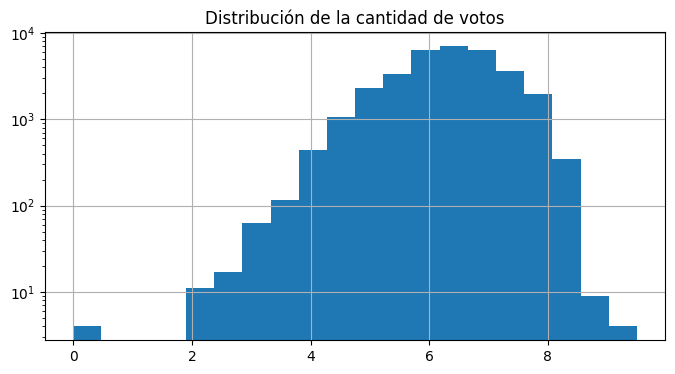

In [337]:
plt.figure(figsize = (8,4))

df_todo['vote_average'].hist(log = True, bins = 20)
plt.title('Distribución de la cantidad de votos')

plt.show()


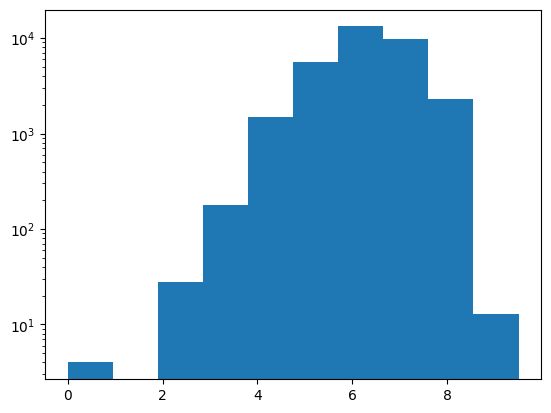

In [338]:
plt.hist(df_todo.vote_average, log= True)
plt.show()

In [339]:
df_poco_vote_average=df_todo[df_todo['vote_average']<=10].copy()

In [340]:
len(df_todo['id_pelicula'].unique())

12124

In [341]:
# No es un mal valor a quitar, pero por ahora sigamos analizando.

len(df_poco_vote_average['id_pelicula'].unique())

12124

In [342]:
len(df_poco_vote_average['id_pelicula'][df_poco_vote_average['vote_average']<=9].unique())

12122

In [343]:
len(df_poco_vote_average['id_pelicula'][df_poco_vote_average['vote_average']<=8].unique())

11975

In [344]:
len(df_poco_vote_average['id_pelicula'][df_poco_vote_average['vote_average']<=7].unique())

9419

In [345]:
len(df_poco_vote_average['id_pelicula'][df_poco_vote_average['vote_average']<=6].unique())

4522

In [346]:
len(df_poco_vote_average['id_pelicula'][df_poco_vote_average['vote_average']<5].unique())

902

In [347]:
len(df_poco_vote_average['id_pelicula'][df_poco_vote_average['vote_average']<=5].unique())

1088

In [348]:
len(df_poco_vote_average['id_pelicula'][df_poco_vote_average['vote_average']<5].unique())

902

In [349]:
len(df_poco_vote_average['id_pelicula'][df_poco_vote_average['vote_average']<=4].unique())

165

In [350]:
len(df_poco_vote_average['id_pelicula'][df_poco_vote_average['vote_average']<=3].unique())

21

In [351]:
len(df_poco_vote_average['id_pelicula'][df_poco_vote_average['vote_average']<=2].unique())

3

In [352]:
len(df_poco_vote_average['id_pelicula'][df_poco_vote_average['vote_average']<=1].unique())

1

Con lo visto anteriormente, nos conviene quitar los valores de la columna "vote_average" menores a 5

In [353]:
df_poco_vote_average['popularity'][df_poco_vote_average['vote_average']<5].max()

34.145916

In [354]:
df_todo=df_todo[df_todo['vote_average']>5].copy()

In [355]:
# Antes hago los cambios para ver si filtrando filas se quitan todas las que contienen vacios.
df_todo.isna().sum()

id_pelicula       0
title             0
popularity        0
vote_average      0
vote_count        0
release_year      0
budget            0
revenue           0
genre_id         12
collection_id     0
director_id      43
dtype: int64

In [356]:
len(df_todo['id_pelicula'].unique())

11036

In [357]:
df_todo['popularity'][df_todo['genre_id'].isna()].max()

6.83946

In [358]:
df_todo['vote_average'][df_todo['genre_id'].isna()].max()

7.9

In [359]:
df_todo['vote_count'][df_todo['genre_id'].isna()].max()

403.0

## Nulos

Me deshago de las filas con vacios en la columna genre_id.<br>
Muy probablemente pierda cast_id y crew_id, pero de ser necesario para optimizar lo voy a hacer.

In [360]:
df_todo_quito=df_todo[df_todo['genre_id'].isna()].copy()


In [361]:
df_todo_quito=df_todo_quito[df_todo_quito['vote_count']>=20].copy()

In [362]:
len(df_todo_quito['id_pelicula'].unique())

12

In [363]:
df_todo_quito.drop_duplicates(inplace=True)
df_todo_quito.isna().sum()

id_pelicula       0
title             0
popularity        0
vote_average      0
vote_count        0
release_year      0
budget            0
revenue           0
genre_id         12
collection_id     0
director_id       2
dtype: int64

In [364]:
lista=list(df_todo_quito['id_pelicula'].unique())

In [365]:
df_todo_quito['id_pelicula'].unique()

array([  1777,  19422,  42438,  56804,  43211,  38328,  38315,  38313,
        41610, 315620, 394412,  80617], dtype=int64)

In [366]:
data['title'][data['id_pelicula'].isin(lista)]

7889                   Fahrenheit 9/11
13994                   Lost in Austen
25308                  Ricky e Barabba
25873                  Viaggi di nozze
30106                7 Kilos in 7 Days
31532               Che ne sarà di noi
32027                Scuola di ladri 2
32029                School of Thieves
32034         Fracchia The Human Beast
34718    Doctor Who: A Christmas Carol
40476                            Fiore
43957      Mythbusters Holiday Special
Name: title, dtype: object

Borrar los vacios de genre_id solamente quita 13 peliculas, asi que voy a proceder con esa limpieza.

In [367]:
df_todo.dropna(axis=0,subset=['genre_id'],inplace=True)

In [368]:
df_todo.shape

(29930, 11)

In [369]:
df_todo.isna().sum()

id_pelicula       0
title             0
popularity        0
vote_average      0
vote_count        0
release_year      0
budget            0
revenue           0
genre_id          0
collection_id     0
director_id      41
dtype: int64

In [370]:
df_drop=df_todo.dropna(inplace=False).copy()

In [371]:
len(df_drop['id_pelicula'].unique())

11005

In [372]:
len(df_todo['id_pelicula'].unique())

11024

In [373]:
lista1=list(df_drop['id_pelicula'])

In [374]:
Pel_eliminadas=df_todo[~df_todo['id_pelicula'].isin(lista1)]

In [375]:
Pel_eliminadas['popularity'].max()

7.33781

In [376]:
len(Pel_eliminadas['id_pelicula'].unique())

19

In [377]:
len(df_todo['id_pelicula'].unique())

11024

In [378]:
df_todo.dropna(inplace=True)

C:\Users\lasso\AppData\Local\Temp\ipykernel_14500\532877491.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_todo.corr(method='pearson')


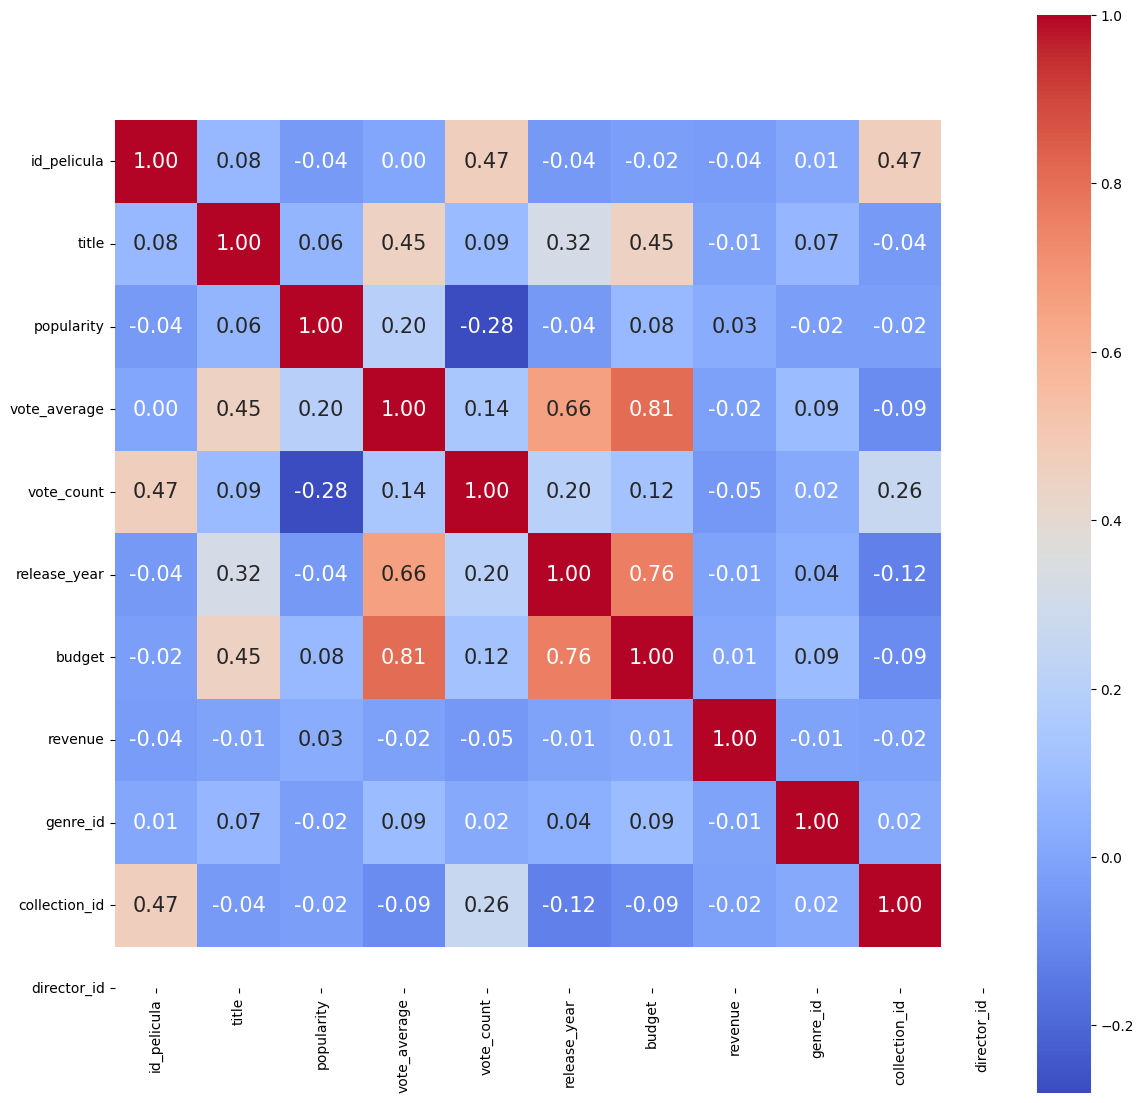

In [379]:
corr = df_todo.corr(method='pearson')
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df_todo.columns, 
           yticklabels= df_todo.columns,
           cmap= 'coolwarm')

plt.show()

Resulta que aun habiendo toda esa cantidad de cambios quedaron bastante datos sin correlaciones con id_pelicula, o popularity, ni vote_average, asi que para mejorar la predicción se van a quitar alguna de estas columnas.

La que me parece mejor y más lógica de quitar es cast_id. y para evitar perder peliculas por los vacios que estas generaron anteriormente, directamente voy a quitar el merge que se hizo con este df.

# Graficos finales 

### Nube de palabras

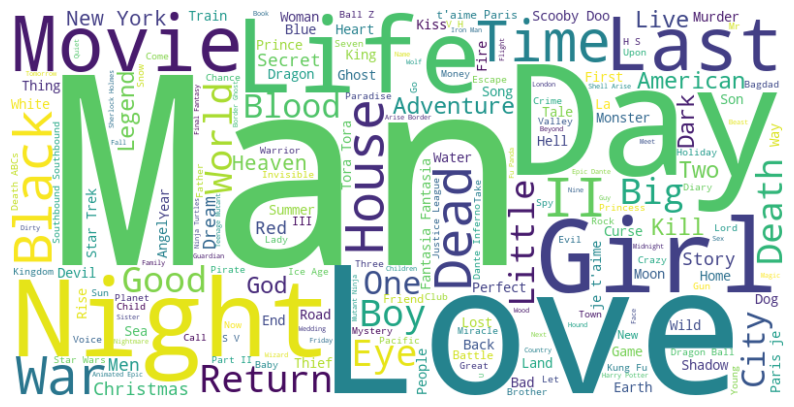

In [380]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Concatenar los títulos en un solo string
text = ' '.join(df_todo['title'].astype(str))

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [381]:
list(df_todo['genre_id'].unique())

[16.0,
 35.0,
 10751.0,
 12.0,
 14.0,
 10749.0,
 18.0,
 28.0,
 80.0,
 53.0,
 27.0,
 36.0,
 878.0,
 9648.0,
 10752.0,
 10402.0,
 99.0,
 10769.0,
 37.0,
 10770.0]

In [382]:
df_todo['genre_id'].value_counts()

18.0       5786
35.0       4194
53.0       2966
28.0       2461
10749.0    1973
80.0       1658
12.0       1656
27.0       1529
10751.0    1319
878.0      1173
16.0       1157
14.0       1035
9648.0      884
36.0        483
10402.0     453
99.0        423
10752.0     383
37.0        211
10770.0     115
10769.0      30
Name: genre_id, dtype: int64

In [383]:
df_todo['genre_id'].value_counts().index

Float64Index([   18.0,    35.0,    53.0,    28.0, 10749.0,    80.0,    12.0,
                 27.0, 10751.0,   878.0,    16.0,    14.0,  9648.0,    36.0,
              10402.0,    99.0, 10752.0,    37.0, 10770.0, 10769.0],
             dtype='float64')

In [384]:
df_genero=pd.read_csv("csv/genres.csv")
df_genero.drop_duplicates(inplace=True)

In [385]:
df_genero[['id','name']].value_counts()

id       name           
18.0     Drama              20234
35.0     Comedy             13175
53.0     Thriller            7614
10749.0  Romance             6728
28.0     Action              6588
27.0     Horror              4668
80.0     Crime               4302
99.0     Documentary         3919
12.0     Adventure           3488
878.0    Science Fiction     3037
10751.0  Family              2765
9648.0   Mystery             2461
14.0     Fantasy             2309
16.0     Animation           1928
10769.0  Foreign             1618
10402.0  Music               1597
36.0     History             1397
10752.0  War                 1322
37.0     Western             1042
10770.0  TV Movie             765
dtype: int64

In [386]:
df_todo['genre_id'].value_counts()

18.0       5786
35.0       4194
53.0       2966
28.0       2461
10749.0    1973
80.0       1658
12.0       1656
27.0       1529
10751.0    1319
878.0      1173
16.0       1157
14.0       1035
9648.0      884
36.0        483
10402.0     453
99.0        423
10752.0     383
37.0        211
10770.0     115
10769.0      30
Name: genre_id, dtype: int64

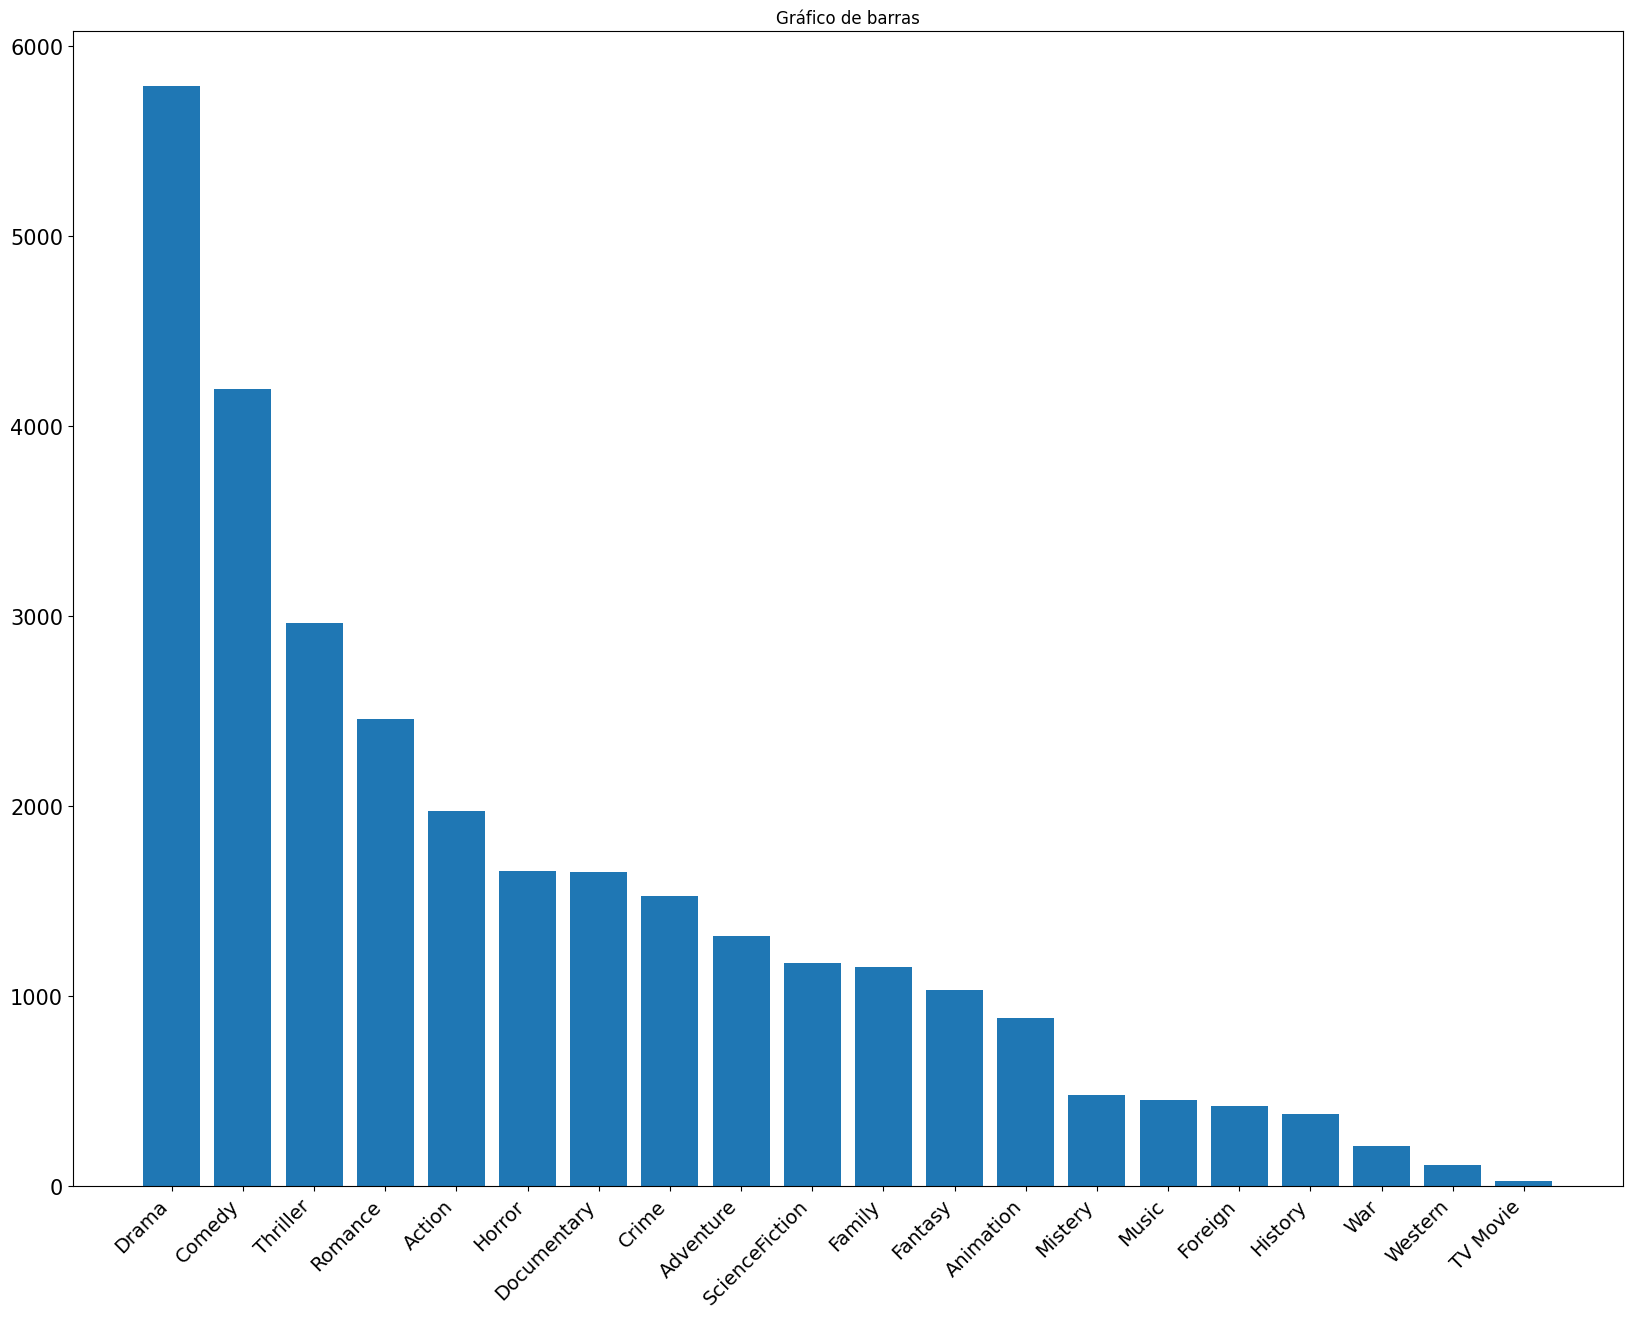

In [387]:
# Hacer scatter plot basandonos en el genero de las peliculas
# Para ver que devuelve
categorias = ['Drama','Comedy','Thriller','Romance','Action','Horror','Documentary','Crime','Adventure','ScienceFiction','Family','Fantasy','Animation','Mistery','Music','Foreign','History','War','Western','TV Movie']
valores = list(df_todo['genre_id'].value_counts())

# Crear gráfico de barras
plt.figure(figsize=(20,15))
plt.bar(categorias, valores)

# Personalizar el gráfico
plt.xticks(fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.title('Gráfico de barras')
plt.yticks(fontsize=15)

# Mostrar el gráfico
plt.show()

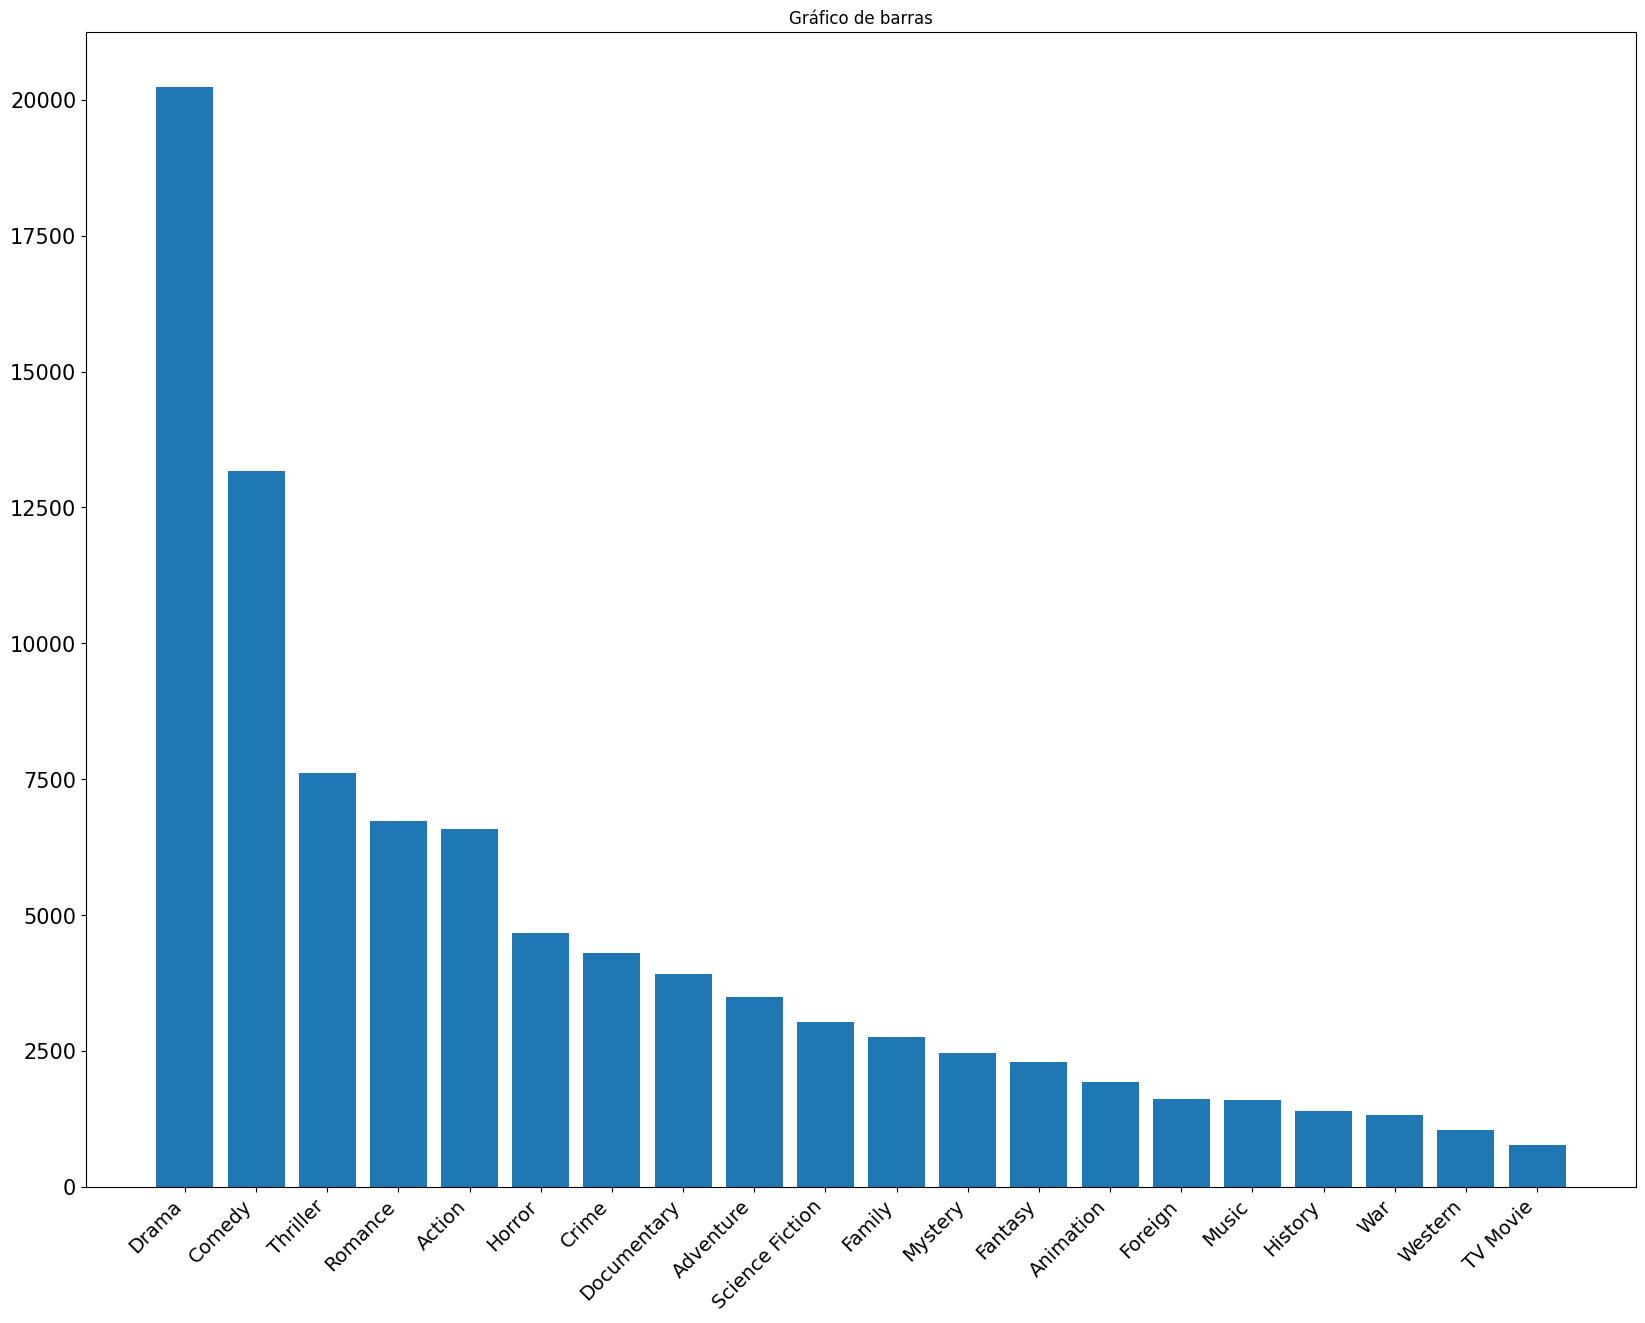

In [388]:
# Si hago el mismo gráfico para el dataset de generos sin filtrar
# (es decir antes de los cambios a df_todo)
# Hacer scatter plot basandonos en el genero de las peliculas
# Para ver que devuelve
categorias = list(df_genero['name'].value_counts().index)
valores = list(df_genero['name'].value_counts())

# Crear gráfico de barras
plt.figure(figsize=(20,15))
plt.bar(categorias, valores)

# Personalizar el gráfico
plt.xticks(fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.title('Gráfico de barras')
plt.yticks(fontsize=15)

# Mostrar el gráfico
plt.show()

In [407]:
df_todo.drop(columns='title',inplace=True)

In [392]:
df_todo.to_csv(r"D:\Programacion\DataScience_Henry\Proyecto_Individual1\csv\df_todo.csv",index=False)

In [ ]:
df_todo=pd.read_csv("csv/df_todo.csv")

In [389]:
df_todo.columns

Index(['id_pelicula', 'title', 'popularity', 'vote_average', 'vote_count',
       'release_year', 'budget', 'revenue', 'genre_id', 'collection_id',
       'director_id'],
      dtype='object')

In [416]:
df_todo.head(1)

,id_pelicula,popularity,vote_average,vote_count,release_year,budget,revenue,genre_id,collection_id,director_id
0,862,21.946943,7.7,5415.0,1995,30000000.0,373554033.0,16.0,10194.0,7879.0


In [458]:
data=pd.read_csv("csv/data.csv")

In [459]:
data.drop(columns=['original_language','tagline','return','overview','status','release_date'],inplace=True)
data.drop_duplicates(inplace=True)

In [460]:
data['title'].value_counts()

Cinderella                     11
Hamlet                          9
Alice in Wonderland             9
Les Misérables                  8
Beauty and the Beast            8
                               ..
The Expendables                 1
Scott Pilgrim vs. the World     1
The Spanish Main                1
Svengali                        1
Queerama                        1
Name: title, Length: 42196, dtype: int64

In [461]:
titulo="Cinderella"

In [462]:
id_pel=data['id_pelicula'][data['title']==titulo]

In [463]:
list(id_pel)

[11224,
 42884,
 92349,
 105875,
 261985,
 150689,
 42651,
 44459,
 289673,
 114108,
 98604]

In [464]:
data[data['id_pelicula'].isin(list(id_pel))]

,id_pelicula,title,runtime,popularity,vote_average,vote_count,release_year,budget,revenue
991,11224,Cinderella,74.0,14.436858,6.8,1760.0,1950,2900000.0,263591415.0
13068,42884,Cinderella,88.0,2.102013,6.1,28.0,1997,0.0,0.0
23471,92349,Cinderella,52.0,0.361288,5.4,7.0,1914,0.0,0.0
23482,105875,Cinderella,48.0,2.154873,6.0,2.0,2002,0.0,0.0
28350,261985,Cinderella,180.0,0.987462,5.3,9.0,2011,0.0,0.0
28623,150689,Cinderella,105.0,19.801128,6.7,2426.0,2015,95000000.0,543514353.0
34200,42651,Cinderella,80.0,0.486073,4.8,5.0,1947,0.0,0.0
35534,44459,Cinderella,77.0,0.209552,5.9,5.0,1957,0.0,0.0
35536,289673,Cinderella,90.0,1.085134,5.6,5.0,2000,0.0,0.0
40994,114108,Cinderella,5.0,1.301063,5.5,19.0,1899,0.0,0.0


In [468]:
from sklearn.metrics.pairwise import euclidean_distances
id_pel=data['id_pelicula'][data['title']==titulo]
df=df_todo[df_todo['id_pelicula'].isin(id_pel)].drop(columns='id_pelicula')
df.drop_duplicates(inplace=True)

In [469]:
df

,popularity,vote_average,vote_count,release_year,budget,revenue,genre_id,collection_id,director_id
2547,14.436858,6.8,1760.0,1950,2900000.0,263591415.0,10751.0,55419.0,64864.0
2548,14.436858,6.8,1760.0,1950,2900000.0,263591415.0,10751.0,55419.0,11434.0
2549,14.436858,6.8,1760.0,1950,2900000.0,263591415.0,10751.0,55419.0,11429.0
2550,14.436858,6.8,1760.0,1950,2900000.0,263591415.0,14.0,55419.0,64864.0
2551,14.436858,6.8,1760.0,1950,2900000.0,263591415.0,14.0,55419.0,11434.0
2552,14.436858,6.8,1760.0,1950,2900000.0,263591415.0,14.0,55419.0,11429.0
2553,14.436858,6.8,1760.0,1950,2900000.0,263591415.0,16.0,55419.0,64864.0
2554,14.436858,6.8,1760.0,1950,2900000.0,263591415.0,16.0,55419.0,11434.0
2555,14.436858,6.8,1760.0,1950,2900000.0,263591415.0,16.0,55419.0,11429.0
2556,14.436858,6.8,1760.0,1950,2900000.0,263591415.0,10749.0,55419.0,64864.0


# ML

In [393]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import scipy as sp
from sklearn.metrics.pairwise import cosine_similarity

In [394]:
x=df_todo.drop(columns='id_pelicula')

In [395]:
x.shape

(29889, 10)

In [396]:
y=df_todo['id_pelicula']

In [397]:
type(y)

pandas.core.series.Series

In [398]:
y.shape

(29889,)

In [399]:
type(x.values)

numpy.ndarray

In [400]:
x.values

array([['Toy Story', 21.946943, 7.7, ..., 16.0, 10194.0, 7879.0],
       ['Toy Story', 21.946943, 7.7, ..., 35.0, 10194.0, 7879.0],
       ['Toy Story', 21.946943, 7.7, ..., 10751.0, 10194.0, 7879.0],
       ...,
       ['In a Heartbeat', 20.82178, 8.3, ..., 35.0, 0.0, 1809041.0],
       ['In a Heartbeat', 20.82178, 8.3, ..., 35.0, 0.0, 1809042.0],
       ['Cadet Kelly', 4.392389, 5.2, ..., 35.0, 0.0, 1212412.0]],
      dtype=object)

In [401]:
x.loc[29889][:]

title              Unknown
popularity       13.505066
vote_average           6.4
vote_count           116.0
release_year          2006
budget           3700000.0
revenue          3338228.0
genre_id              18.0
collection_id          0.0
director_id        59651.0
Name: 29889, dtype: object

In [402]:
x

,title,popularity,vote_average,vote_count,release_year,budget,revenue,genre_id,collection_id,director_id
0,Toy Story,21.946943,7.7,5415.0,1995,30000000.0,373554033.0,16.0,10194.0,7879.0
1,Toy Story,21.946943,7.7,5415.0,1995,30000000.0,373554033.0,35.0,10194.0,7879.0
2,Toy Story,21.946943,7.7,5415.0,1995,30000000.0,373554033.0,10751.0,10194.0,7879.0
3,Jumanji,17.015539,6.9,2413.0,1995,65000000.0,262797249.0,12.0,0.0,4945.0
4,Jumanji,17.015539,6.9,2413.0,1995,65000000.0,262797249.0,14.0,0.0,4945.0
...,...,...,...,...,...,...,...,...,...,...
102851,In a Heartbeat,20.821780,8.3,146.0,2017,0.0,0.0,10749.0,0.0,1809041.0
102852,In a Heartbeat,20.821780,8.3,146.0,2017,0.0,0.0,10749.0,0.0,1809042.0
102853,In a Heartbeat,20.821780,8.3,146.0,2017,0.0,0.0,35.0,0.0,1809041.0
102854,In a Heartbeat,20.821780,8.3,146.0,2017,0.0,0.0,35.0,0.0,1809042.0


In [403]:
x.values

array([['Toy Story', 21.946943, 7.7, ..., 16.0, 10194.0, 7879.0],
       ['Toy Story', 21.946943, 7.7, ..., 35.0, 10194.0, 7879.0],
       ['Toy Story', 21.946943, 7.7, ..., 10751.0, 10194.0, 7879.0],
       ...,
       ['In a Heartbeat', 20.82178, 8.3, ..., 35.0, 0.0, 1809041.0],
       ['In a Heartbeat', 20.82178, 8.3, ..., 35.0, 0.0, 1809042.0],
       ['Cadet Kelly', 4.392389, 5.2, ..., 35.0, 0.0, 1212412.0]],
      dtype=object)

In [404]:
X_train, X_test, y_train, y_test = train_test_split(x.values, y, test_size=0.10, random_state=60)

In [405]:
X_train[0]

array(['Astro Boy', 13.293466, 6.1, 420.0, 2009, 65000000.0, 44091067.0,
       28.0, 0.0, 33183.0], dtype=object)

In [406]:
X_train = X_train.reshape(-1, 9)

ValueError: cannot reshape array of size 269000 into shape (9)

In [ ]:
X_train[0]

array([1.3293466e+01, 6.1000000e+00, 4.2000000e+02, 2.0090000e+03,
       6.5000000e+07, 4.4091067e+07, 2.8000000e+01, 0.0000000e+00,
       3.3183000e+04])

In [ ]:
print(X_train.shape)
print(y_train.shape)

(26900, 9)
(26900,)


In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
type(y_train)

pandas.core.series.Series

In [ ]:
print('Proporción de etiquetas en set de entrenamiento:', y_train.sum()/y_train.count())
print('Proporción de etiquetas en set de testeo:', y_test.sum()/y_test.count())

Proporción de etiquetas en set de entrenamiento: 71038.9147583643
Proporción de etiquetas en set de testeo: 73141.20575443291


In [ ]:
param_grid = {'n_neighbors':np.arange(1,80),
              'weights': ['uniform', 'distance'], 
              'leaf_size':np.arange(1, 32),
              'algorithm':['auto','ball_tree']}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7,metric=cosine_similarity)

In [ ]:
y_train[0]

862

In [ ]:
knn.fit(X_train,y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[8.64163084e+00 6.47360967e+00 4.74515651e+02 1.99807900e+03
 1.84235989e+07 5.39272974e+07 1.89699621e+03 3.12595259e+04
 1.36254314e+05].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
df_todo['id_pelicula'].unique()

array([   862,   8844,  15602, ..., 432789, 455661,  14008], dtype=int64)

In [ ]:
predigo=knn.predict(df_todo[df_todo['id_pelicula']==862].drop(columns='id_pelicula'))

c:\Users\lasso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [ ]:
predigo

array([862, 862, 862], dtype=int64)

Como veo bastante dificil e imposible que genere un modelo machine learning que haga lo que quiera, voy a ir haciendo la función sin utilizar estos modelos.<br>
Luego de terminarla de esta manera voy a seguir intentando hacerla con modelos de machine learning, pero quiero al menos dejar una función usable.